In [1]:
library(igraph)
library(data.table)
library(network)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



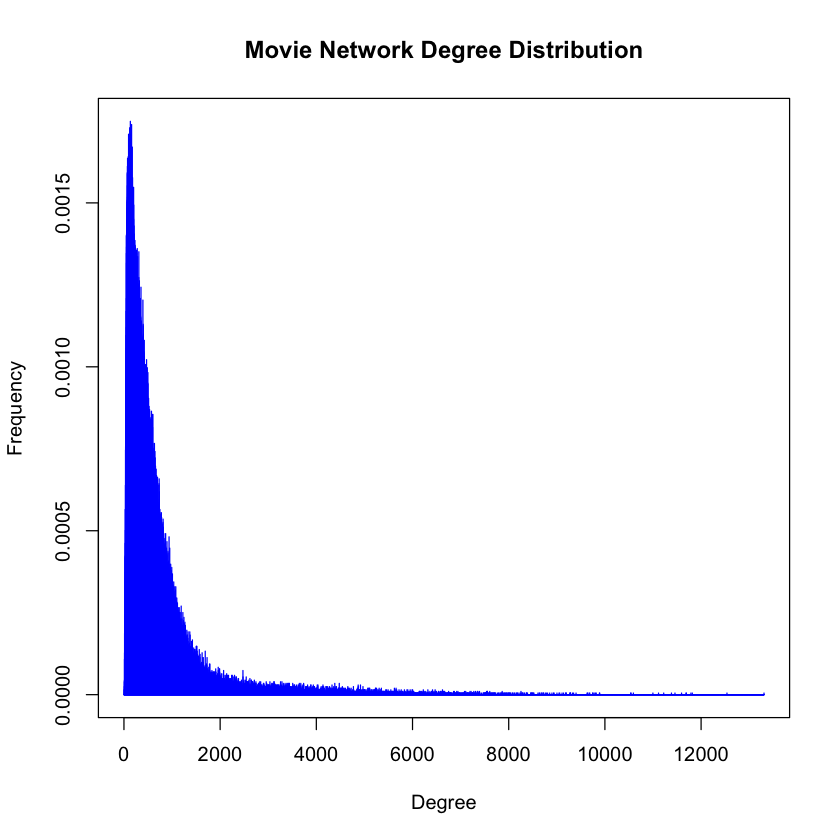

In [2]:
# Q6 degree distribution of the movie network
g = read.graph("edge_list.txt", format="ncol", directed=FALSE)
dd = degree.distribution(g)
plot(dd, type = "h", main = "Movie Network Degree Distribution", xlab = "Degree", ylab = "Frequency", col = "blue")

In [174]:
max(degree(g))
min(degree(g))
median(degree(g))
max(degree.distribution(g))
min(degree.distribution(g))

[1] 13307

[1] 3

[1] 418

[1] 0.001748767

[1] 0

In [2]:
g = read.graph("edge_list.txt", format="ncol", directed=FALSE)

In [3]:
V(g)

+ 203572/203572 vertices, named, from 9f6e4b3:
    [1] 0      1      2      3      4      5      6      7      8      9     
   [11] 25     38     2339   2660   3586   3702   4734   5406   5587   6834  
   [21] 7655   7764   7827   7864   9377   9444   9959   10379  11372  11375 
   [31] 12945  12947  14546  16670  17598  18306  19936  20991  21955  22021 
   [41] 22048  23167  23264  27129  27237  28092  29580  31104  31114  31213 
   [51] 32001  33421  33764  34698  35619  39259  40206  40486  41280  41322 
   [61] 43387  43397  44876  45662  46979  47806  48191  48798  48807  51560 
   [71] 51864  53421  53869  54485  55882  57357  57580  58159  58746  59170 
   [81] 60492  60703  61041  61249  61935  62726  64301  64324  66653  67565 
   [91] 68625  69264  69267  70174  70243  73251  74154  74588  74634  75596 
+ ... omitted several vertices

In [5]:
# find communities
communities <- fastgreedy.community(g)

In [6]:
print(communities)

IGRAPH clustering fast greedy, groups: 28, mod: 0.8
+ groups:
  $`1`
      [1] "0"      "1"      "2"      "3"      "4"      "5"      "7"     
      [8] "8"      "9"      "25"     "2339"   "2660"   "3586"   "3702"  
     [15] "4734"   "5406"   "5587"   "6834"   "7655"   "7764"   "7827"  
     [22] "9377"   "9444"   "10379"  "11372"  "11375"  "12947"  "14546" 
     [29] "16670"  "17598"  "18306"  "19936"  "20991"  "21955"  "22021" 
     [36] "22048"  "23167"  "27237"  "28092"  "31104"  "31114"  "31213" 
     [43] "32001"  "33764"  "34698"  "35619"  "39259"  "40206"  "40486" 
     [50] "41280"  "43387"  "43397"  "44876"  "45662"  "46979"  "48191" 
     [57] "48798"  "48807"  "51560"  "51864"  "53421"  "53869"  "54485" 
  + ... omitted several groups/vertices


In [7]:
sizes(communities)

Community sizes
    1     2     3     4     5     6     7     8     9    10    11    12    13 
45029 34719 10562 35695 13574  6130  2338  4510  3506   834  7229  6958  4821 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
 2113  3538  1705  2334  9477  1152   620  5944    12   687    14    17    18 
   27    28 
   22    14 

In [10]:
# generate genre list
genre_data_frame = fread(input="/Users/duanli/Documents/232E/Project4/movie_genre_1tab.txt", sep = "\t", header = FALSE)
movie_data_frame = fread(input="/Users/duanli/Documents/232E/Project4/movie_map.txt", sep = "\t", header = FALSE)

In [12]:
# generate genre and rating list
movie_info = fread(input="/Users/duanli/Documents/232E/Project4/id_movie_genre_rating.txt", sep = "\t", header = FALSE)

In [13]:
genre_list = c()
rating_list = c()
movie_name = ""
for (i in 1:vcount(g)){
    movie_id = V(g)$name[i]
    genre = "NA"
    rating = "NA"
    if (movie_id %in% movie_info$V1) {
        genre = movie_info$V3[which(movie_info$V1 == movie_id)]
        rating = movie_info$V4[which(movie_info$V1 == movie_id)]
    }
    genre_list = rbind(genre_list, genre)
    rating_list = rbind(rating_list, rating)
}

In [16]:
V(g)$genre = genre_list
V(g)$rating = rating_list

In [133]:
# Q7 plot 10 communities
genre_distribution = function(g, communities, com_id) {
    movie_i = (1:vcount(g))[communities$membership == com_id]
#     movie_i_genre = V(g)[movie_i]$genre[which(V(g)[movie_i]$genre != "NA")] 
    movie_i_genre = V(g)[movie_i]$genre
    table = table(movie_i_genre)
    len = length(table)
    occur_num = as.vector(table)
    occur_ratio = occur_num/sum(occur_num)
    p = occur_ratio/sum(occur_ratio)
    x = seq(1, len, by=1)
    plot(x, p, type = "o", main = sprintf("Movie Genre Distribution in Community %s", com_id), xlab = "Degree (Genre Id), Point labels are genres", ylab = "Frequency", col = "blue")
    text(p, labels = names(table), pos = 3, cex=0.5, font=2, col="red")
}

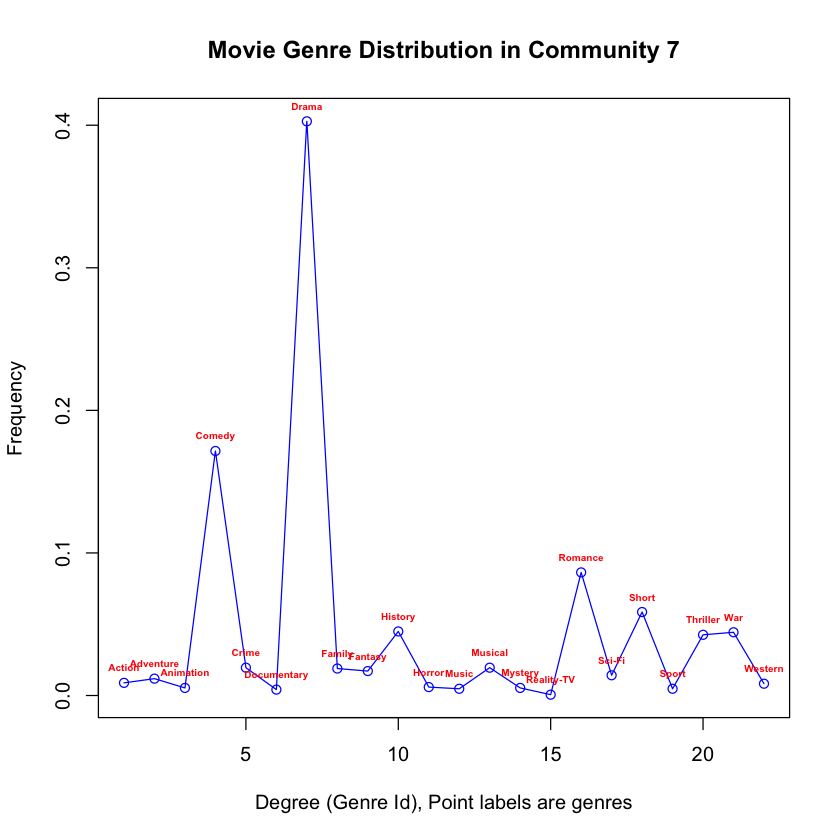

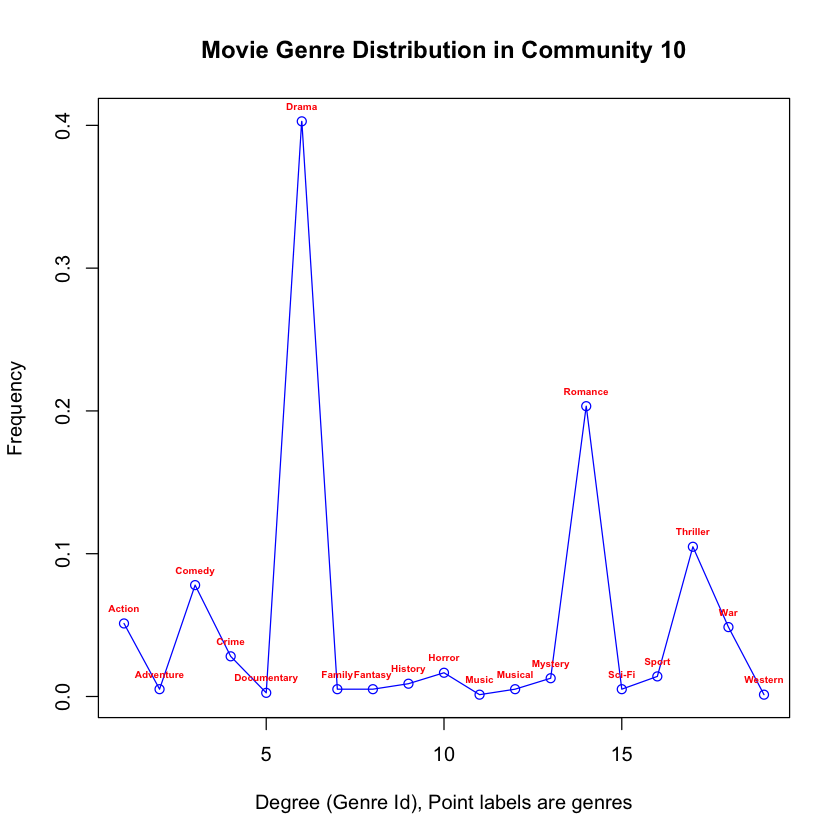

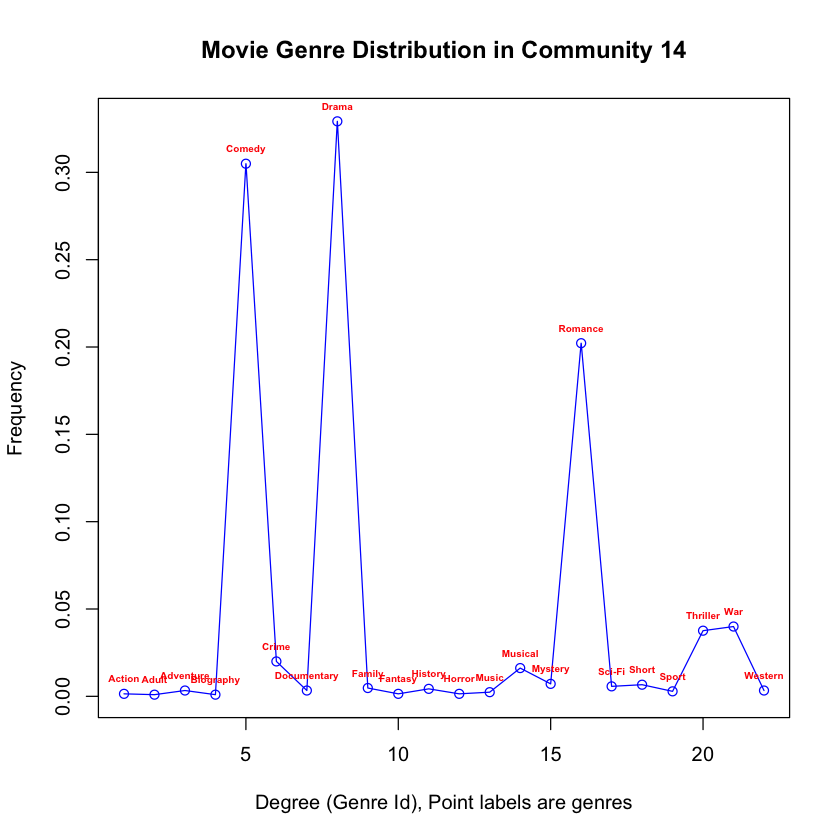

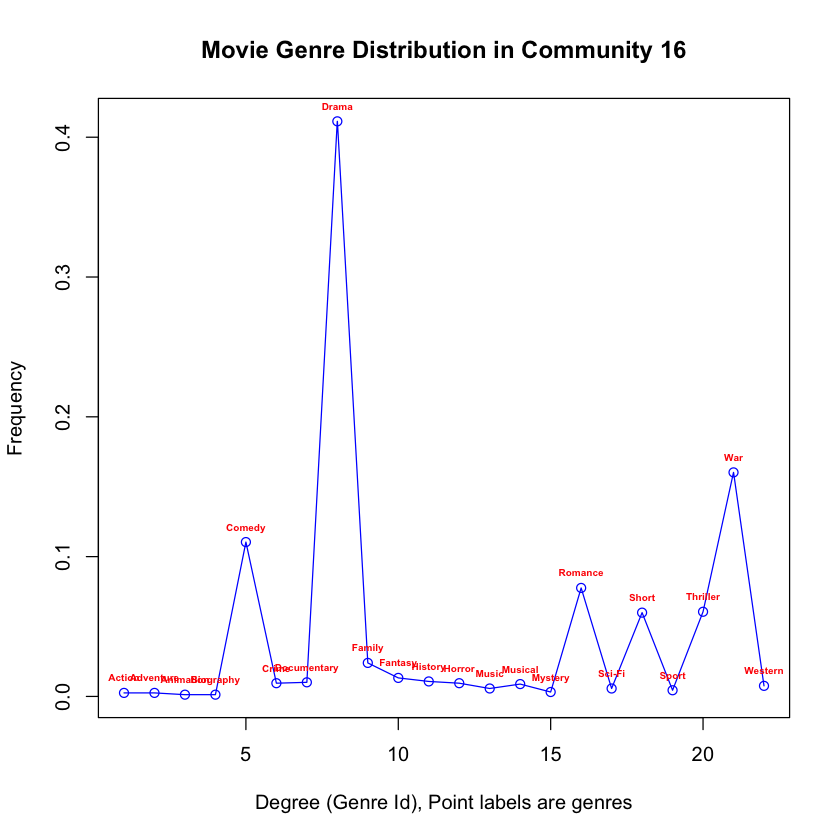

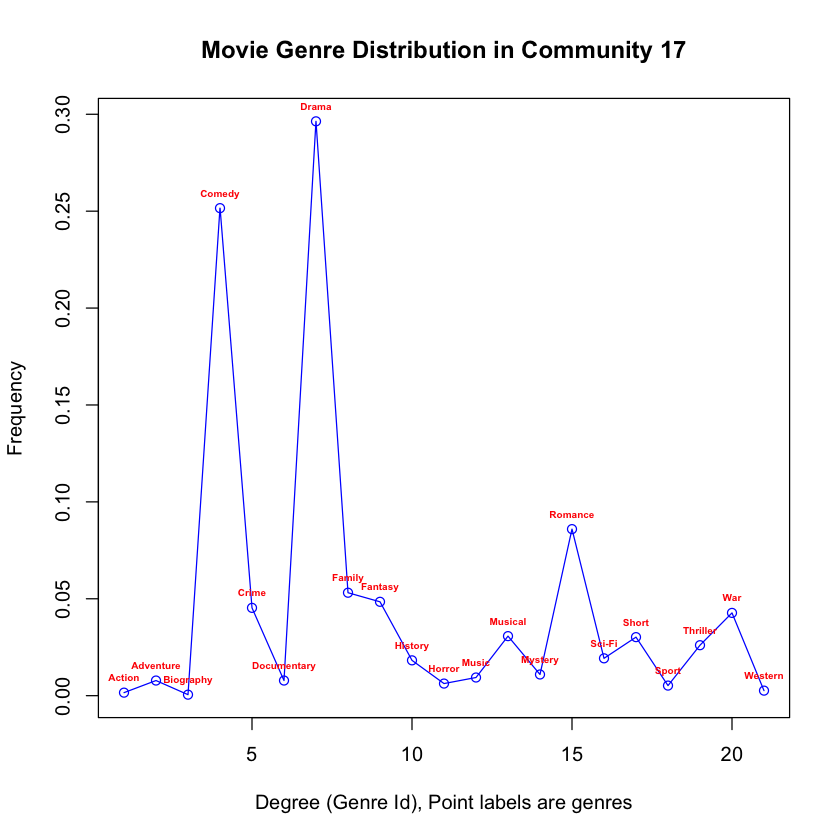

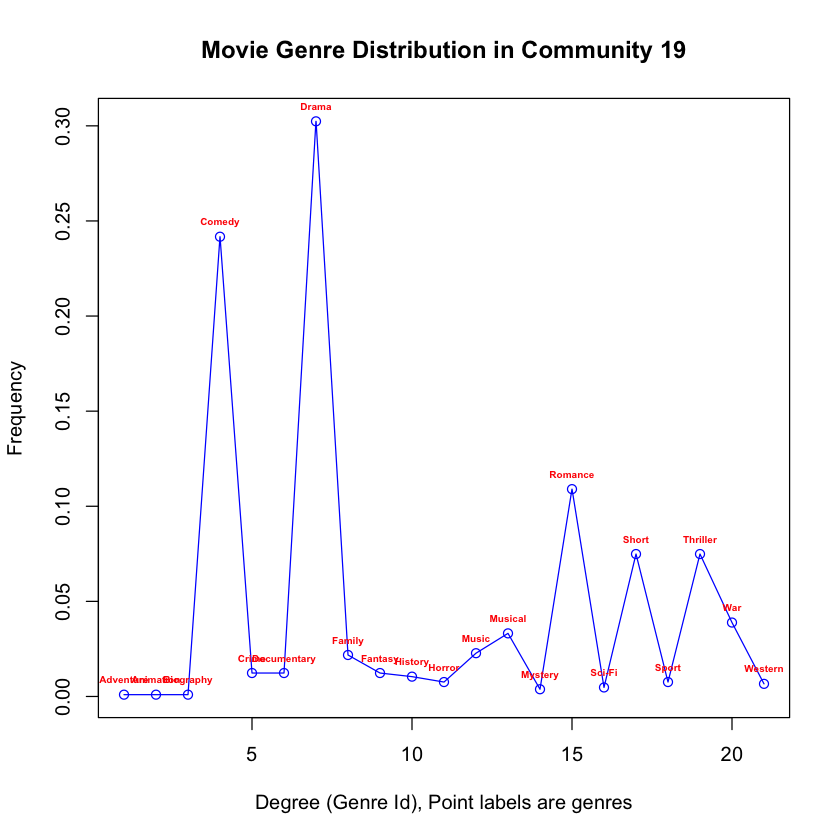

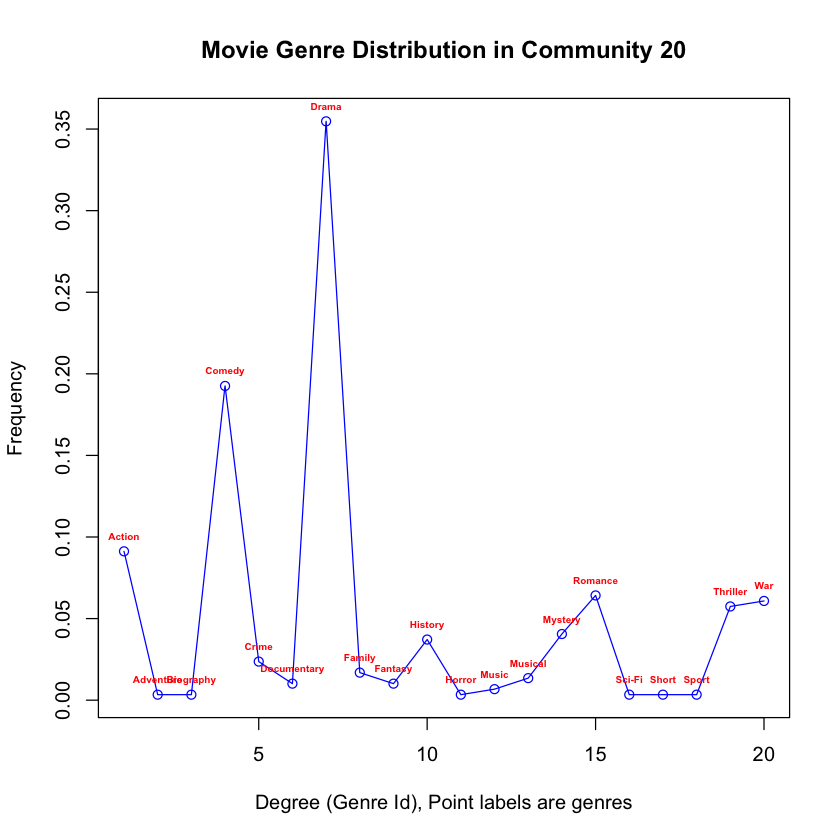

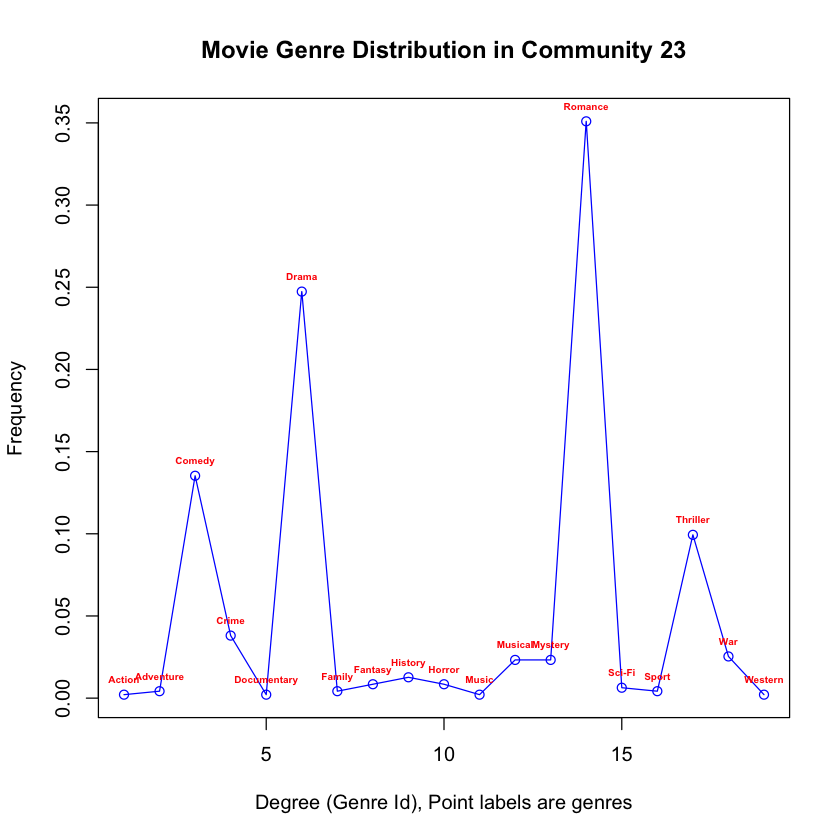

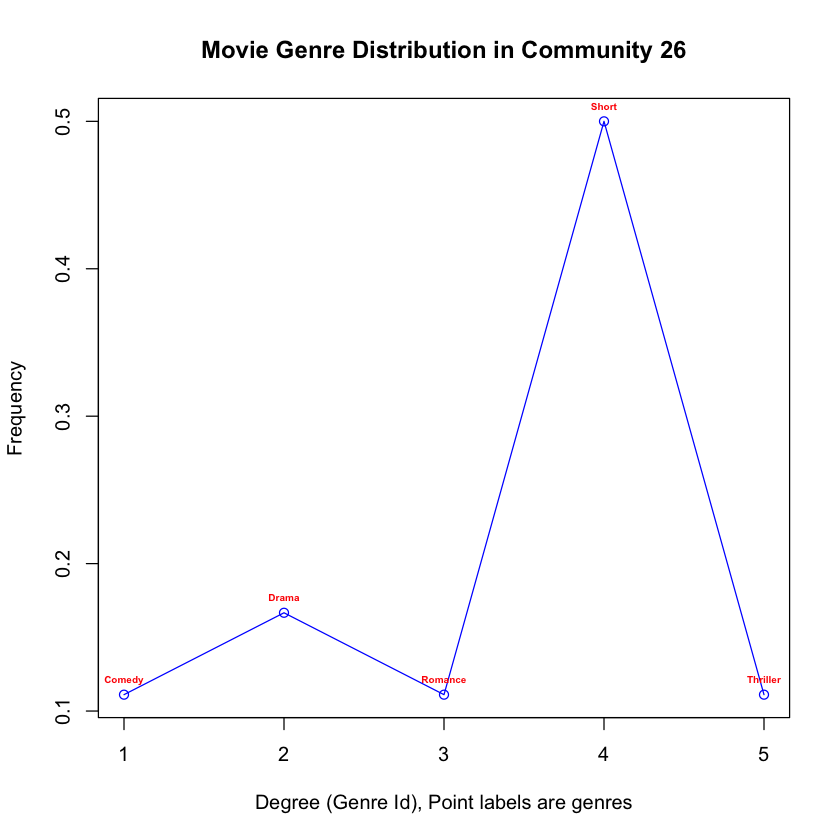

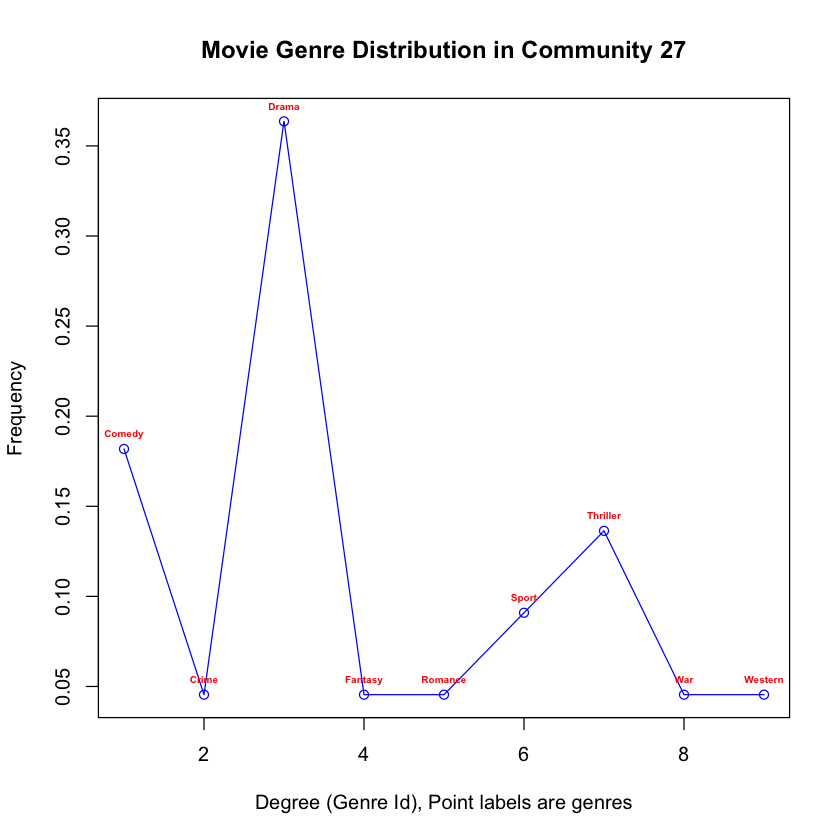

In [134]:
genre_distribution(g, communities, 7)
genre_distribution(g, communities, 10)
genre_distribution(g, communities, 14)
genre_distribution(g, communities, 16)
genre_distribution(g, communities, 17)
genre_distribution(g, communities, 19)
genre_distribution(g, communities, 20)
genre_distribution(g, communities, 23)
genre_distribution(g, communities, 26)
genre_distribution(g, communities, 27)

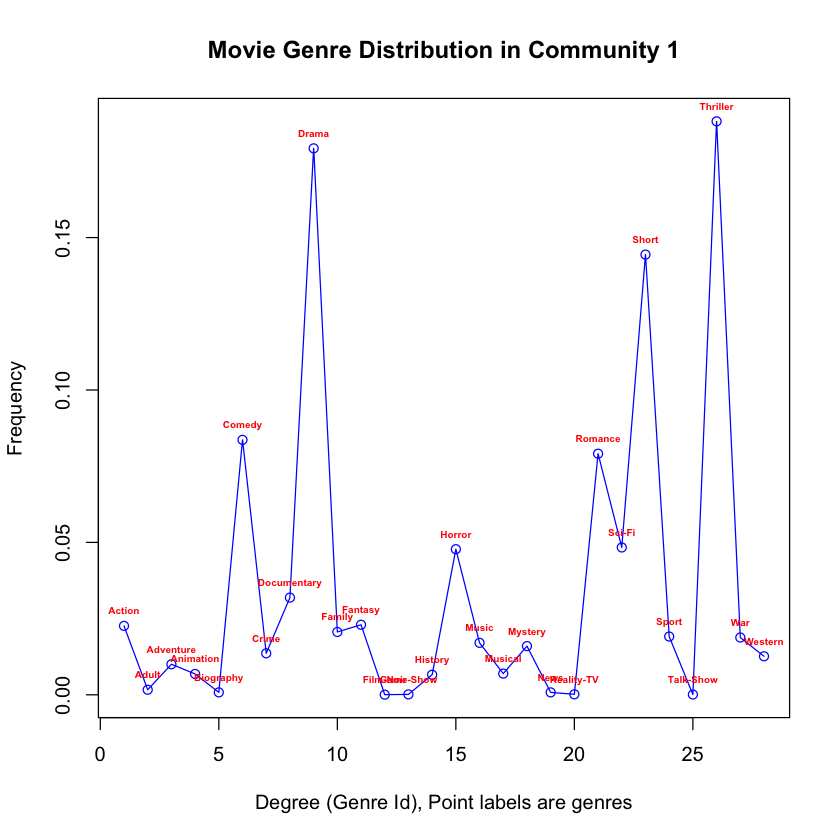

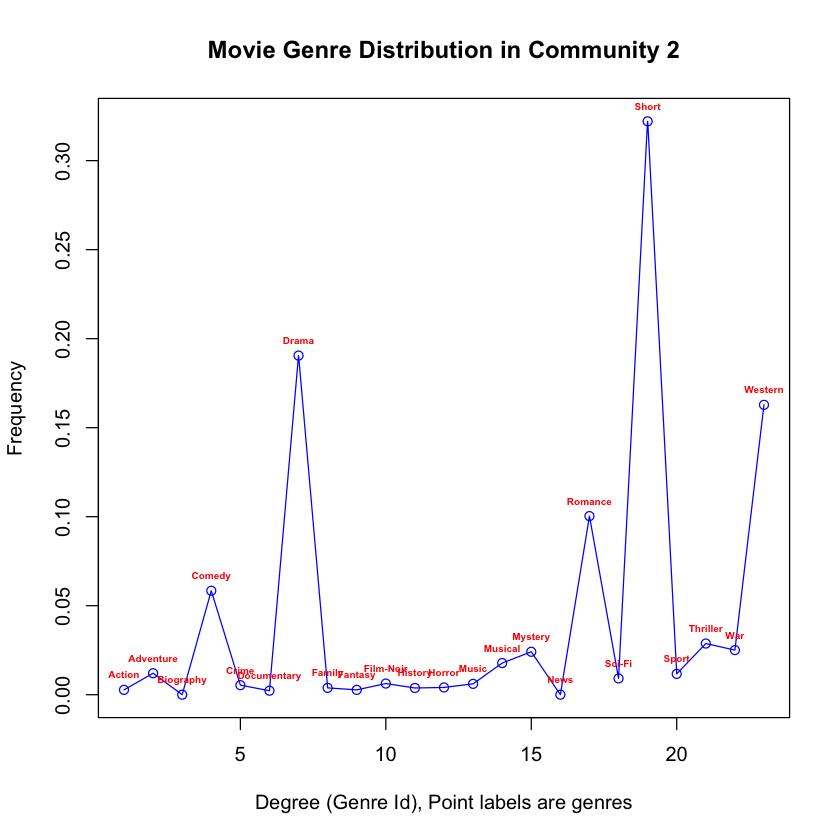

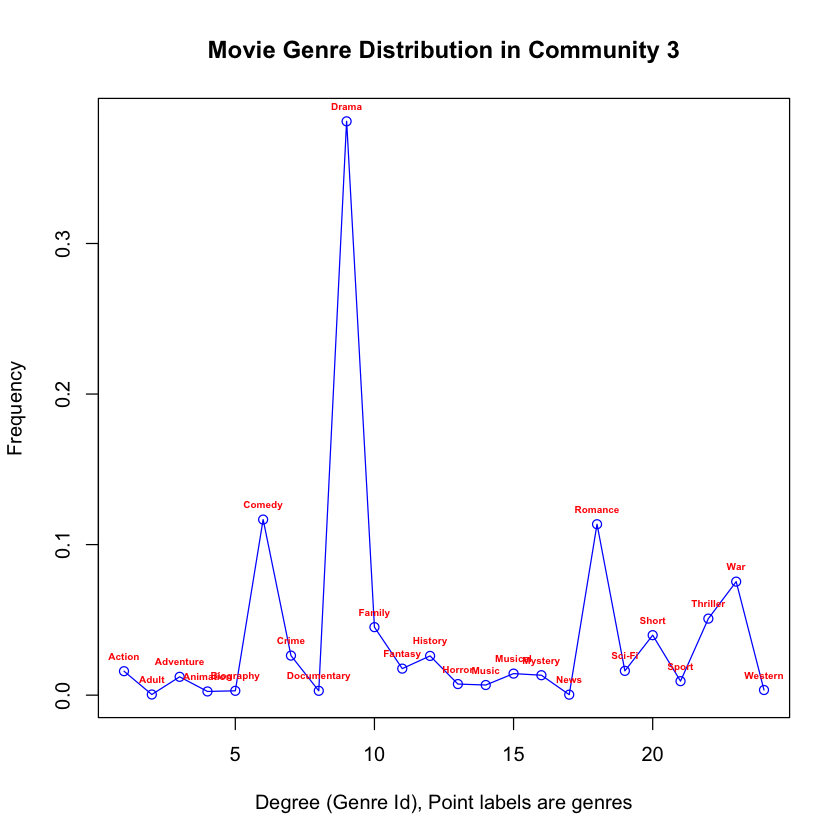

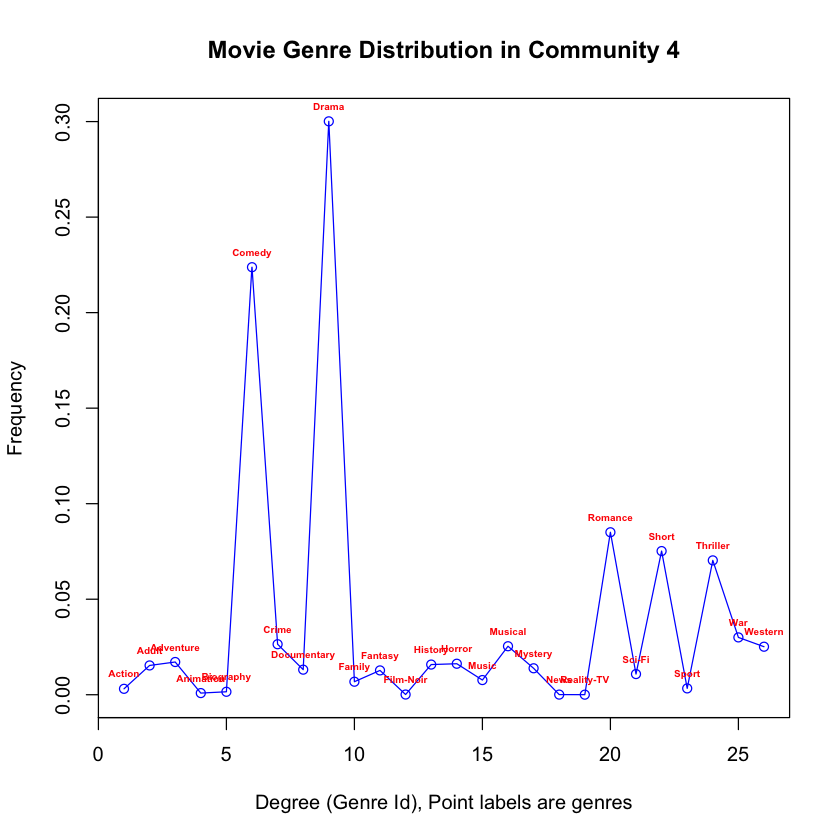

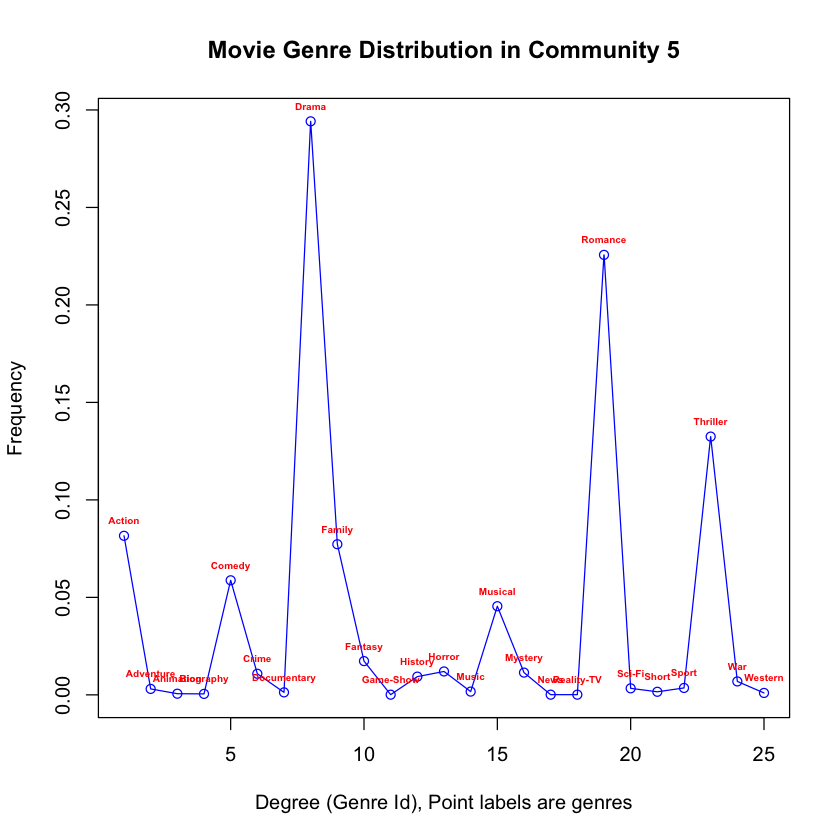

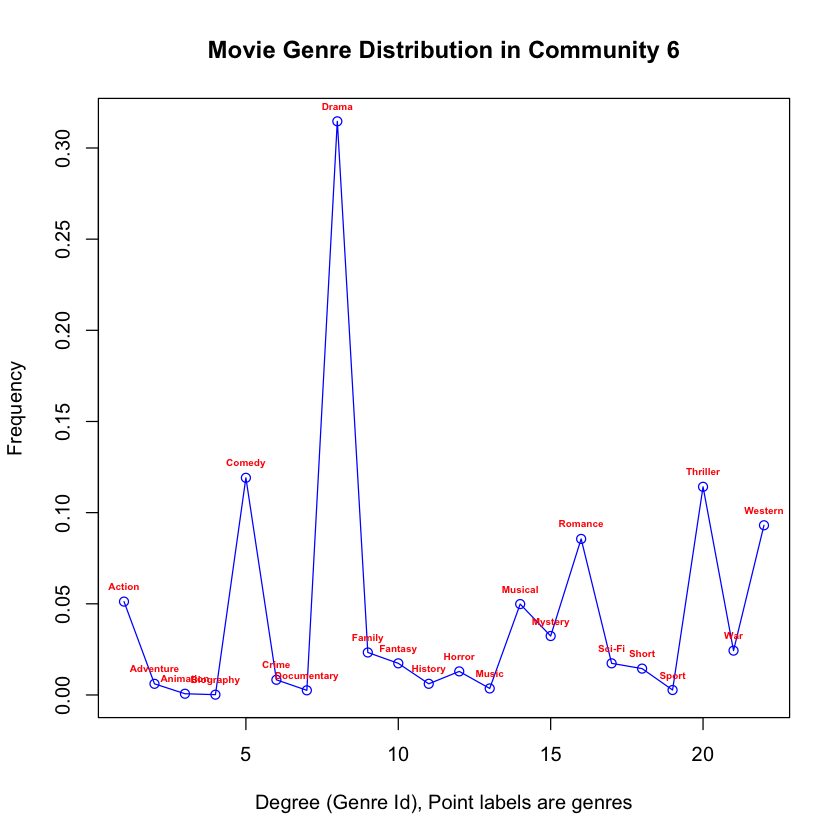

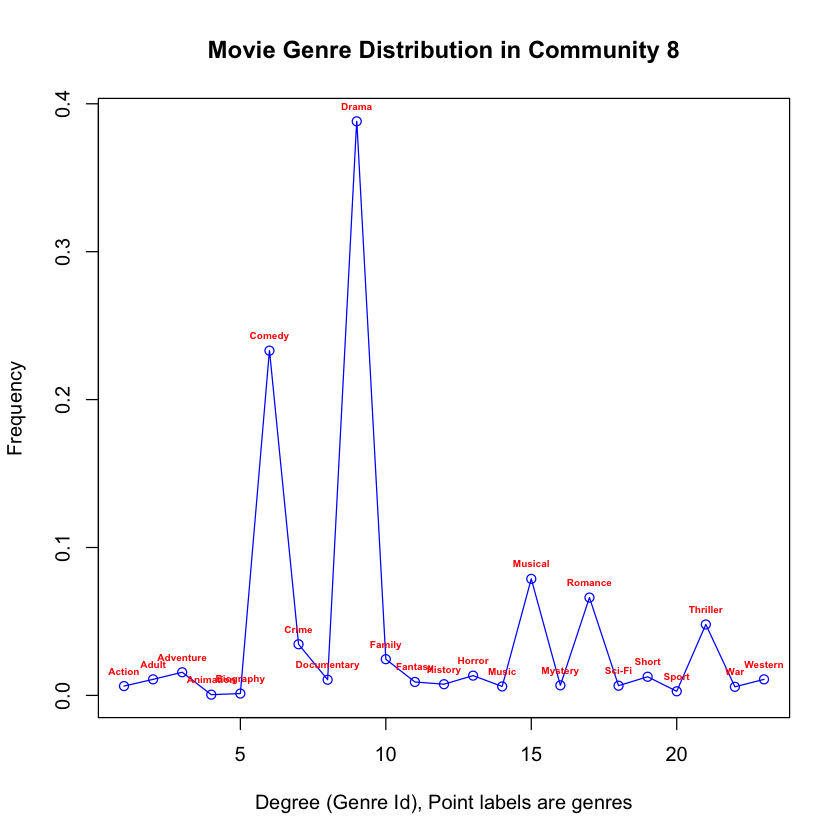

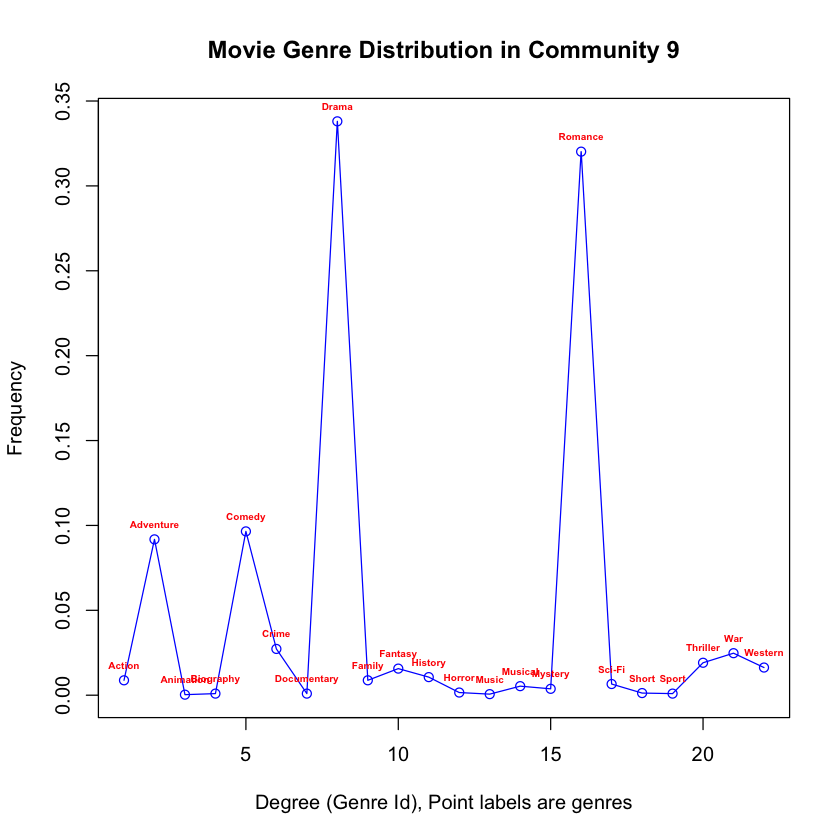

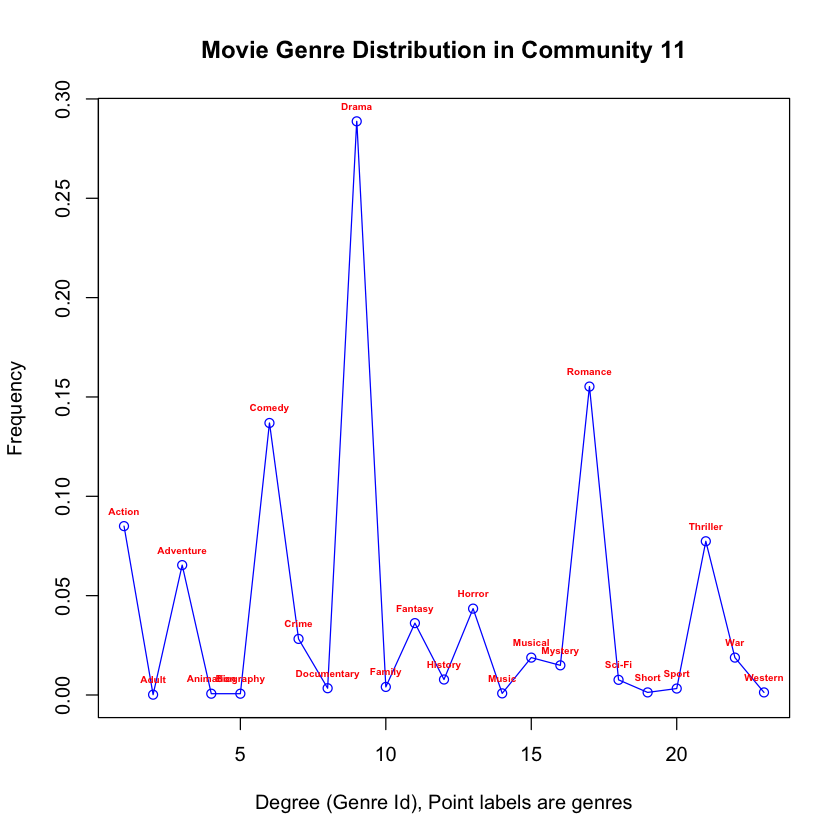

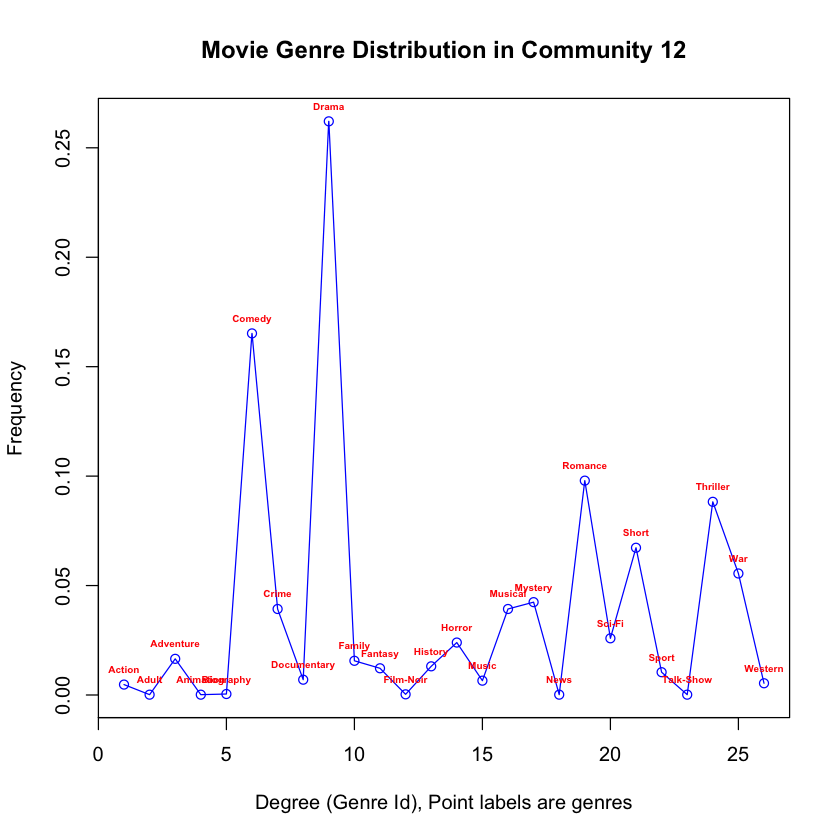

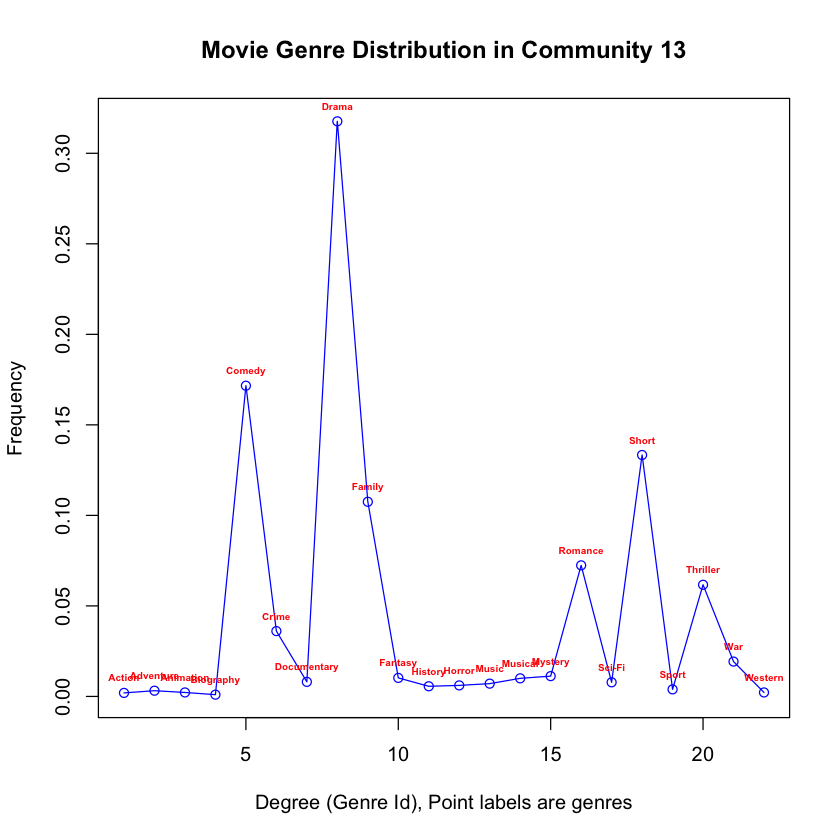

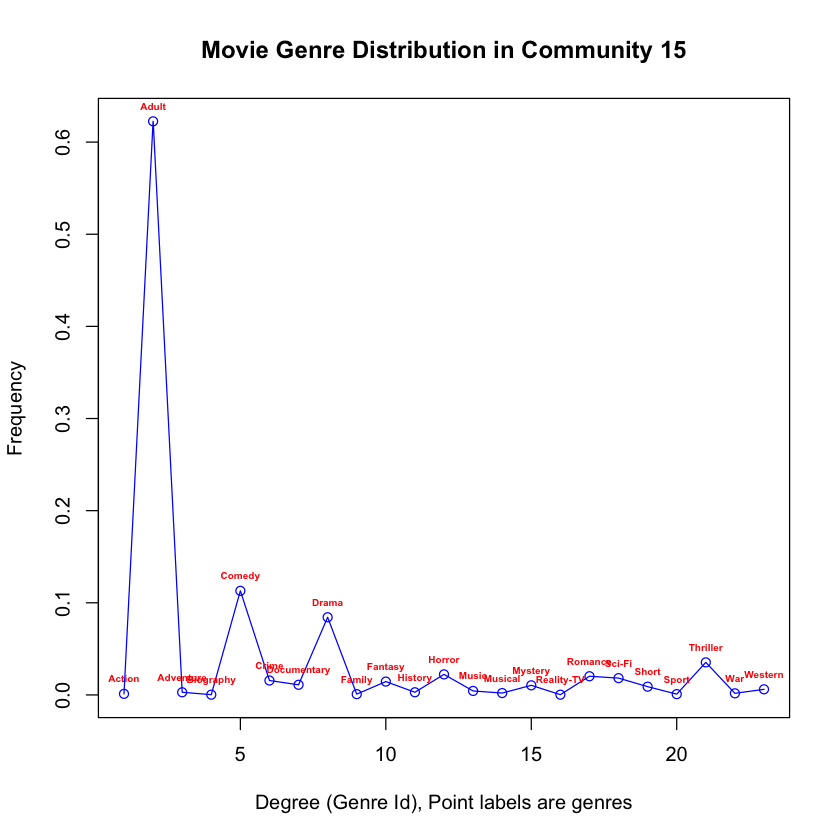

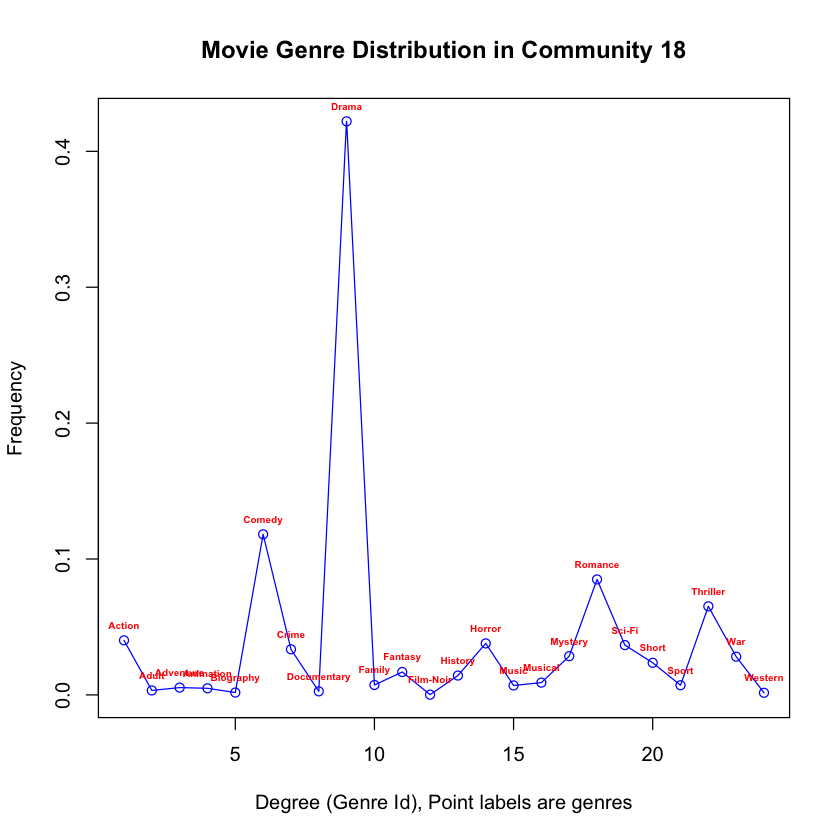

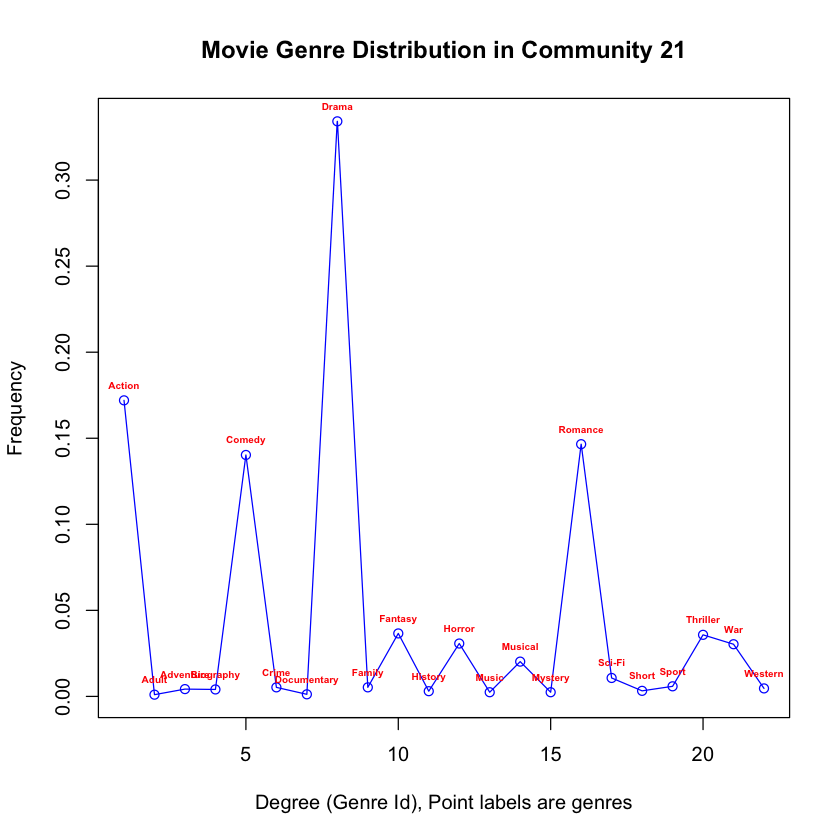

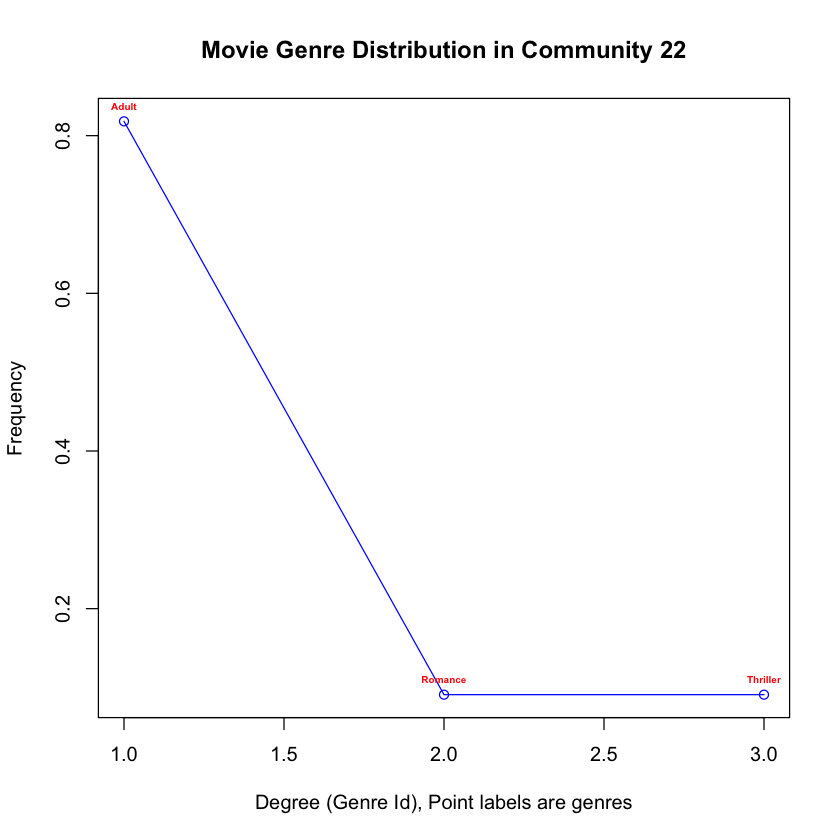

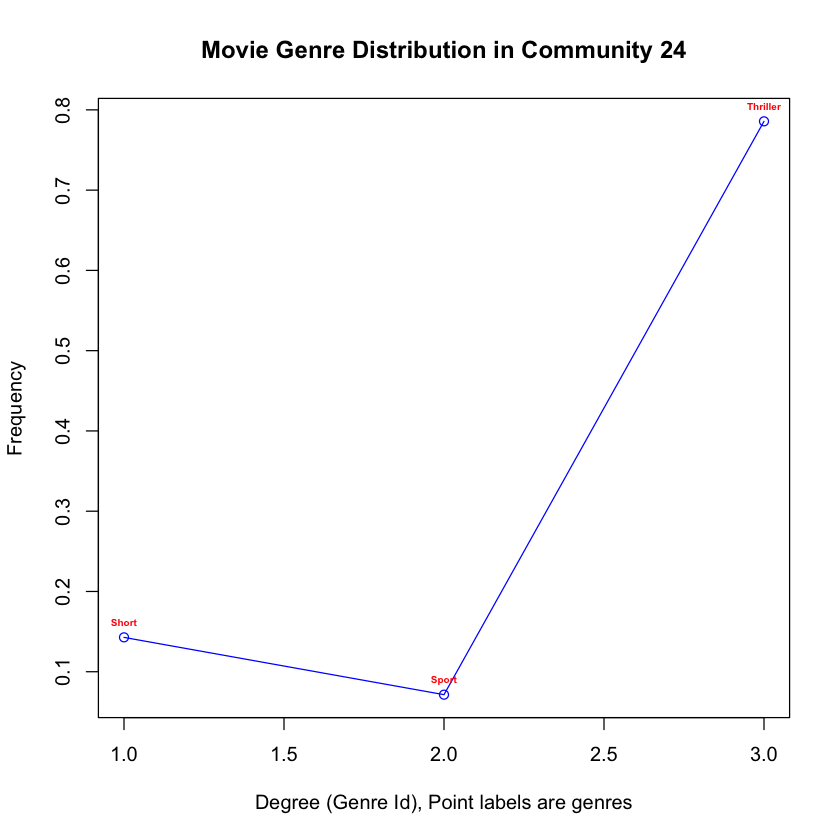

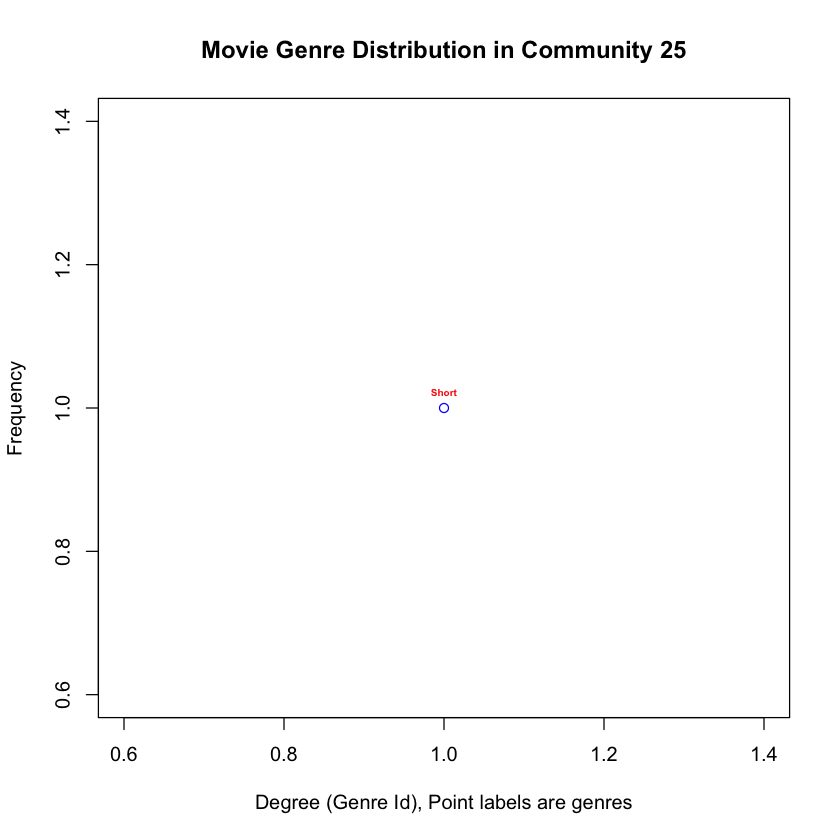

In [135]:
genre_distribution(g, communities, 1)
genre_distribution(g, communities, 2)
genre_distribution(g, communities, 3)
genre_distribution(g, communities, 4)
genre_distribution(g, communities, 5)
genre_distribution(g, communities, 6)
genre_distribution(g, communities, 8)
genre_distribution(g, communities, 9)
genre_distribution(g, communities, 11)
genre_distribution(g, communities, 12)
genre_distribution(g, communities, 13)
genre_distribution(g, communities, 15)
genre_distribution(g, communities, 18)
genre_distribution(g, communities, 21)
genre_distribution(g, communities, 22)
genre_distribution(g, communities, 24)
genre_distribution(g, communities, 25)

In [136]:
# Q8 (a)
genres = list()
occur = list()
for(i in 1:length(sizes(communities))) { 
    movies = (1:vcount(g))[communities$membership == i]
    movies_genre = V(g)[movies]$genre
    movies_genre = table(movies_genre)
    genres[[i]] = names(movies_genre[which.max(movies_genre)])
    occur[[i]] = movies_genre[which.max(movies_genre)]
}

In [138]:
for (i in 1:length(sizes(communities))) {
    print(sprintf("The most frequent dominant genre across community %s is %s (%s)", i, genres[[i]], occur[[i]] ))
}

[1] "The most frequent dominant genre across community 1 is Thriller (8278)"
[1] "The most frequent dominant genre across community 2 is Short (10976)"
[1] "The most frequent dominant genre across community 3 is Drama (3569)"
[1] "The most frequent dominant genre across community 4 is Drama (8322)"
[1] "The most frequent dominant genre across community 5 is Drama (2989)"
[1] "The most frequent dominant genre across community 6 is Drama (1849)"
[1] "The most frequent dominant genre across community 7 is Drama (681)"
[1] "The most frequent dominant genre across community 8 is Drama (1537)"
[1] "The most frequent dominant genre across community 9 is Drama (1079)"
[1] "The most frequent dominant genre across community 10 is Drama (315)"
[1] "The most frequent dominant genre across community 11 is Drama (1780)"
[1] "The most frequent dominant genre across community 12 is Drama (1761)"
[1] "The most frequent dominant genre across community 13 is Drama (1303)"
[1] "The most frequent dominant 

In [139]:
# Q8 (b)
com_size = 0
total_size = sum(sizes(communities))
all_genre = table(V(g)$genre)
genres = list()
scores = list()
for(i in 1:length(sizes(communities))) { 
    max_score = 0
    com_size = sizes(communities)[i]
    movies = (1:vcount(g))[communities$membership == i]
    movies_genre = V(g)[movies]$genre
    movies_genre = table(movies_genre)
    for (j in 1:length(movies_genre)) {
        genre = names(movies_genre)[j]
        c = movies_genre[[j]]
        p = c / com_size
        q = all_genre[[genre]] / total_size
        score = log(c) * p / q
        if (score >= max_score) {
            max_score = score
            scores[[i]] = max_score
            genres[[i]] = genre
        }
    }
}

In [140]:
for (i in 1:length(sizes(communities))) {
    print(sprintf("The the most frequent dominant genre across community %s is %s with score %s", i, genres[[i]], scores[[i]]))
}

[1] "The the most frequent dominant genre across community 1 is Documentary with score 21.2004229178186"
[1] "The the most frequent dominant genre across community 2 is Western with score 36.7154315624206"
[1] "The the most frequent dominant genre across community 3 is War with score 17.7631049288239"
[1] "The the most frequent dominant genre across community 4 is Comedy with score 14.0801301613831"
[1] "The the most frequent dominant genre across community 5 is Family with score 22.0741989815927"
[1] "The the most frequent dominant genre across community 6 is Musical with score 15.3186394210214"
[1] "The the most frequent dominant genre across community 7 is History with score 16.5272074767189"
[1] "The the most frequent dominant genre across community 8 is Musical with score 22.4165422751124"
[1] "The the most frequent dominant genre across community 9 is Adventure with score 38.5615265883621"
[1] "The the most frequent dominant genre across community 10 is Romance with score 10.3989

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

 [1] "Antaki, Joseph"                            
 [2] "Beaulac, Sebastien"                        
 [3] "Boucher-L'Ã\u0089cuyer, Ã\u0089mile Pascal"
 [4] "GagnÃ©, David"                             
 [5] "Priest, Benoit"                            
 [6] "Primeau, Marc"                             
 [7] "Bourassa-Simpson, Mathieu"                 
 [8] "Desjardins, Nick"                          
 [9] "Fortin, Samuel (I)"                        
[10] "Lafond-Martel, Olivier"                    
[11] "Legros, Simon (I)"                         
[12] "Charlebois, Jessica"                       
[13] "Valin, AndrÃ©anne"                         
[14] "Guimont, MÃ©lanie"                         
[15] "Riel-Dery, Jessica"                        
[16] "Leonard, Joshua"                           
[17] "Williams, Michael C."                      
[18] "Donahue, Heather (I)"                      


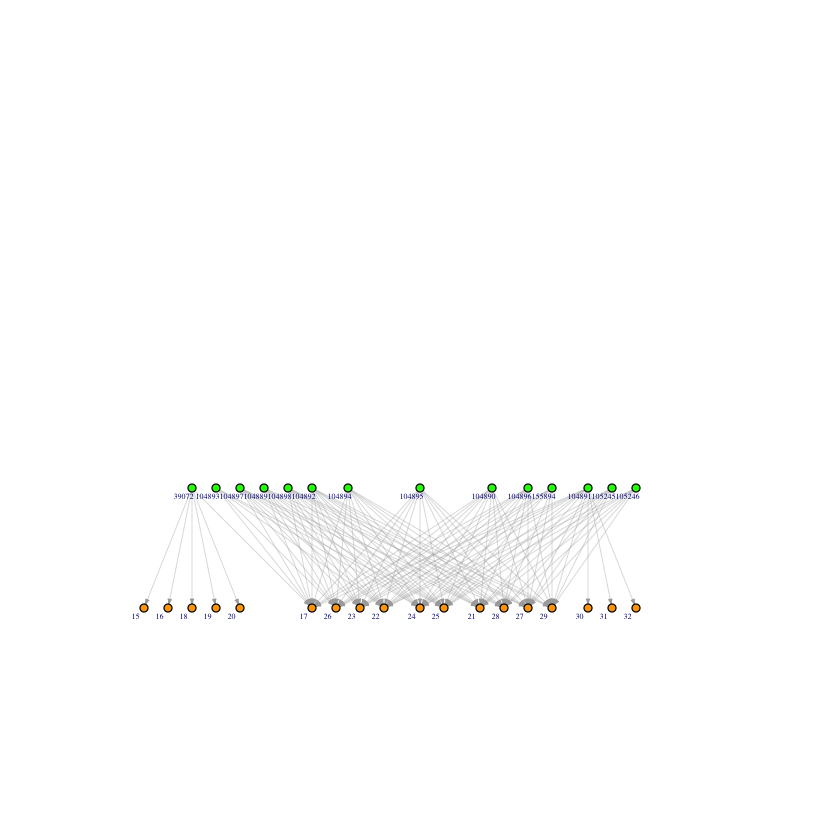

In [170]:
# Q8 (c)
edgelist = fread(input="/Users/duanli/Documents/P4/8c_movie_actor.txt", sep = "\t", header = FALSE)
g1 <- graph.data.frame(edgelist)
col <- c("green","orange")
V(g1)$type <- is.na(as.numeric(V(g1)$name))
names = V(g1)$name
V(g1)[1:14]$label <- names[1:14]
V(g1)[15:32]$label <- c(15:32)
print(names[15:32])
plot(g1, layout = layout_as_bipartite(g1,types = NULL,hgap=0.3,vgap=1.5), 
     vertex.color = col[as.numeric(V(g1)$type)+1], 
     vertex.size=10, vertex.label.dist=-2, rescale=FALSE, 
     vertex.label.cex=0.4, xlim=c(-1,7), ylim=c(1,4), 
     edge.width=0.3, edge.arrow.size=0.2)

In [142]:
movie_i = (1:vcount(g))[communities$membership == 24]
id_list = V(g)[movie_i]$name
name_list = c()
for (id in id_list){
    if (id %in% movie_info$V1) {
        name = movie_info$V2[which(movie_info$V1 == id)]
    }
    name_list = rbind(name_list, name)
}
print(id_list)
print(name_list)

 [1] "104891" "39072"  "104889" "104890" "104892" "104893" "104894" "104895"
 [9] "104896" "104897" "104898" "105245" "105246" "155894"
     [,1]                                         
name "Cent jours avant le lendemain (2015)"       
name "Liverpool (2012)"                           
name "669: Escape the Reality (2011)"             
name "An Olimatsim adventure (2011)"              
name "L'affaire Hawkins (2014)"                   
name "La peur anonyme (2014)"                     
name "La Peur aux trousse (2015)"                 
name "Les oiseaux se cachaient pour mourir (2015)"
name "Midnight Stranger (2011)"                   
name "New York Vengeance (2013)"                  
name "October Sunset (2017)"                      
name "Des humains bien tranquilles (2016)"        
name "Les années folles (2016)"                   
name "Mocakoma (2013)"                            


In [143]:
deg = degree(g1)
sort = order(deg, decreasing=TRUE)
for (i in 1:3) {
    index = sort[i]
    print(index)
    print(V(g1)$name[index])
}

[1] 22
[1] "Desjardins, Nick"
[1] 24
[1] "Lafond-Martel, Olivier"
[1] 25
[1] "Legros, Simon (I)"


In [144]:
# Q9 plot 3 neighbor distributions

# 10321 Batman v Superman: Dawn of Justice (2016); Rating: 6.6
# 39182 Mission: Impossible - Rogue Nation (2015); Rating: 7.4
# 78995 Minions (2015); Rating: 6.4
find_neighbors = function(g, movie) {
    id = which(V(g)$name == movie)
    nei_ids = neighbors(g,id)
    rating_list = c()
    for (nei_id in nei_ids) {
        rate = V(g)[nei_id]$rating
        if (is.na(rate) | rate != "NA") {
            rating_list = rbind(rating_list, rate)
        }
    }
    table = table(rating_list)
    len = length(table)
    occur_num = as.vector(table)
    occur_ratio = occur_num/sum(occur_num)
    p = occur_ratio/sum(occur_ratio)
    x = seq(1, len, by=1)
    x_num = as.numeric(names(table))
    print(sprintf("most frequent rating of neighbors: %s (%s occur, %s freq)", x_num[which.max(p)], occur_num[which.max(p)], signif(occur_ratio[which.max(p)],4)))
    print(sprintf("average rating of neighbors: %s", signif(mean(x_num),5)))
    plot(x, p, type = "o", main = sprintf("Neighbor Rating Degree Distribution (Movie Id = %s)", movie), xlab = "Degree (Rating Id), Point labels are ratings", ylab = "Frequency", col = "blue")
    text(p, labels = names(table), pos = 3, cex=0.5, font=2, col="red")
    return (id)
}

[1] "most frequent rating of neighbors: 6.4 (38 occur, 0.04476 freq)"
[1] "average rating of neighbors: 6.2871"


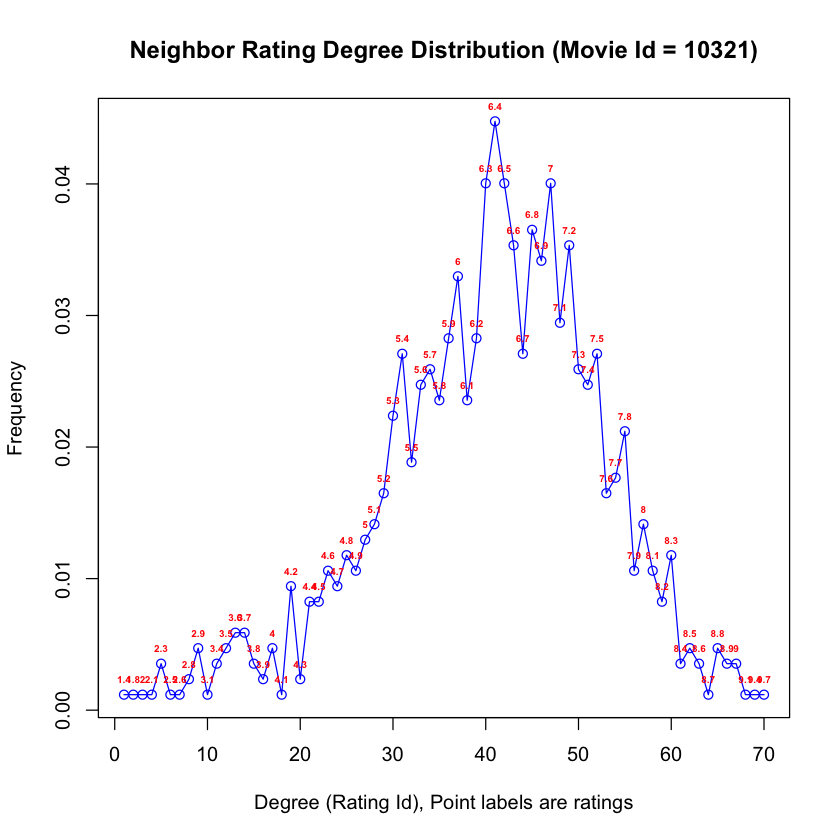

In [145]:
id1 = find_neighbors(g,10321)

[1] "most frequent rating of neighbors: 6.2 (31 occur, 0.04711 freq)"
[1] "average rating of neighbors: 6.091"


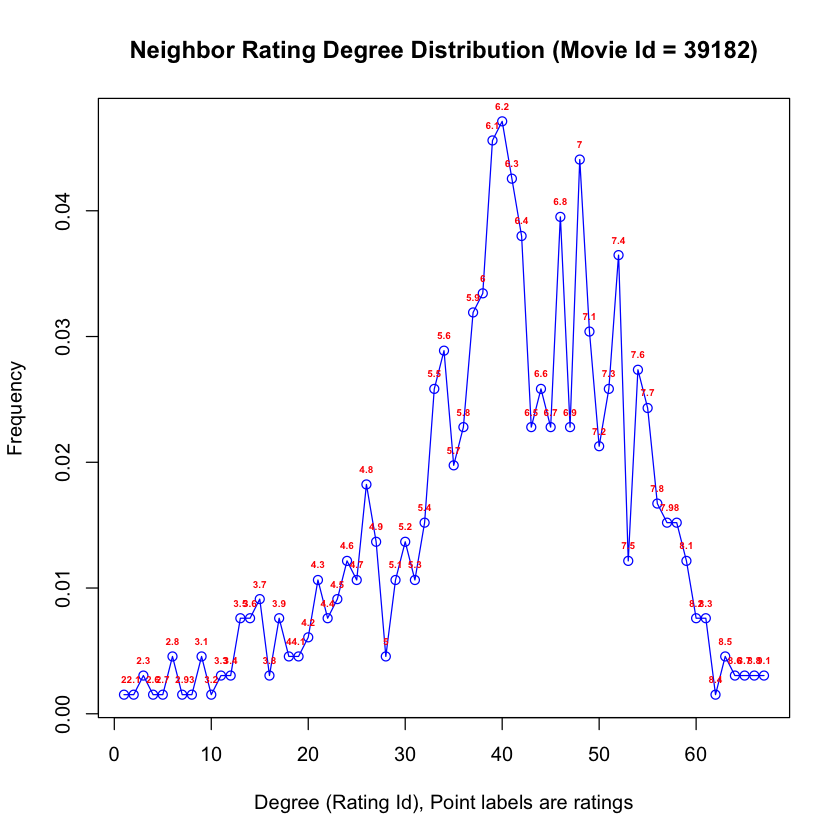

In [146]:
id2 = find_neighbors(g,39182)

[1] "most frequent rating of neighbors: 6.8 (28 occur, 0.0381 freq)"
[1] "average rating of neighbors: 6.5696"


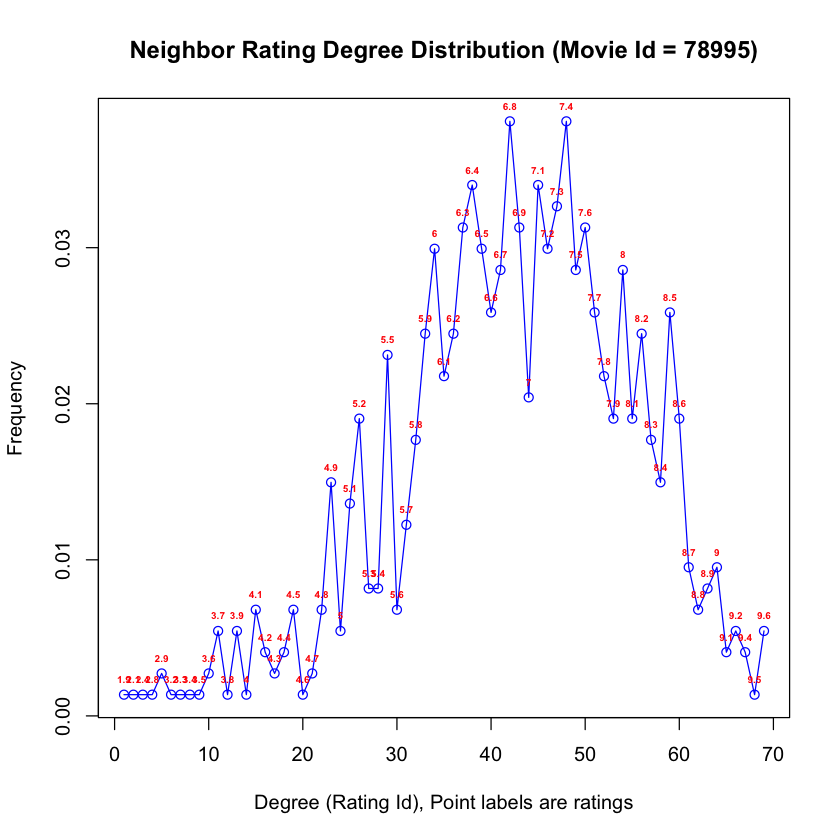

In [147]:
id3 = find_neighbors(g,78995)

In [150]:
# Q10
find_same_coms = function(g, cmmunities, movies, ids) {
    same_coms = list()
    for(i in 1:length(sizes(communities))) { 
        movies_same_com = (1:vcount(g))[communities$membership == i]
        for (j in 1:length(movies)) {
            vids = V(g)[movies_same_com]
            id = ids[j]
            if ( id %in% vids) {
                sub_g = induced_subgraph(g, vids)
                same_coms[[j]] = sub_g
            }
        }
    }
    return (same_coms)
}
find_neighbors2 = function(g, movie) {
    id = which(V(g)$name == movie)
    nei_ids = neighbors(g,id)
    rating_list = c()
    for (nei_id in nei_ids) {
        rate = V(g)[nei_id]$rating
        if (is.na(rate) | rate != "NA") {
            rating_list = rbind(rating_list, rate)
        }
    }
    table = table(rating_list)
    len = length(table)
    occur_num = as.vector(table)
    occur_ratio = occur_num/sum(occur_num)
    p = occur_ratio/sum(occur_ratio)
    x = seq(1, len, by=1)
    x_num = as.numeric(names(table))
    print(sprintf("most frequent rating of neighbors: %s (%s occur, %s freq)", x_num[which.max(p)], occur_num[which.max(p)], signif(occur_ratio[which.max(p)],4)))
    print(sprintf("average rating of neighbors: %s", signif(mean(x_num),5)))
    plot(x, p, type = "o", main = sprintf("Neighbor Rating Degree Distribution (Movie Id = %s)", movie), xlab = "Degree (Rating Id), Point labels are ratings", ylab = "Frequency", col = "blue")
    text(p, labels = names(table), pos = 3, cex=0.5, font=2, col="red")
    return (id)
}

[1] "most frequent rating of neighbors: 6.4 (35 occur, 0.04375 freq)"
[1] "average rating of neighbors: 6.2909"
[1] "most frequent rating of neighbors: 6.1 (28 occur, 0.05027 freq)"
[1] "average rating of neighbors: 6.2366"


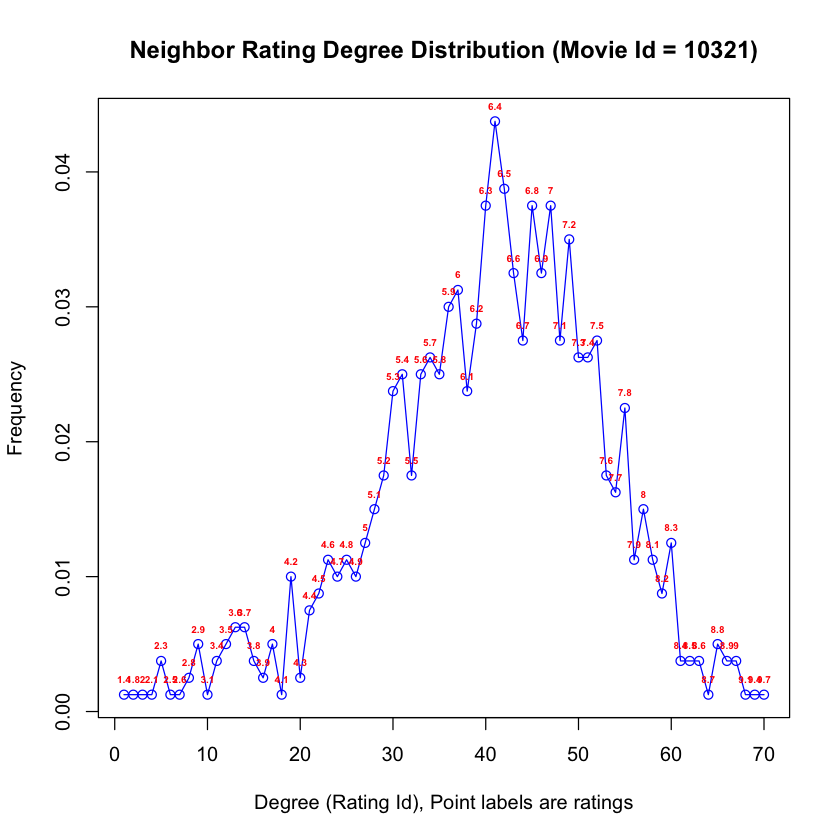

[1] "most frequent rating of neighbors: 7.4 (28 occur, 0.04242 freq)"
[1] "average rating of neighbors: 6.5734"


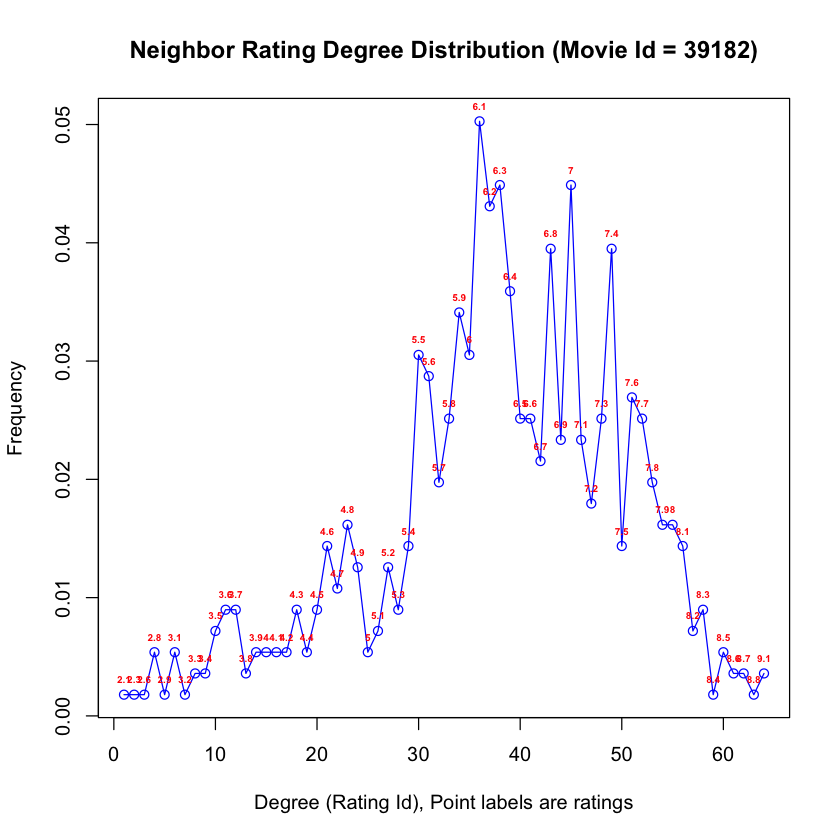

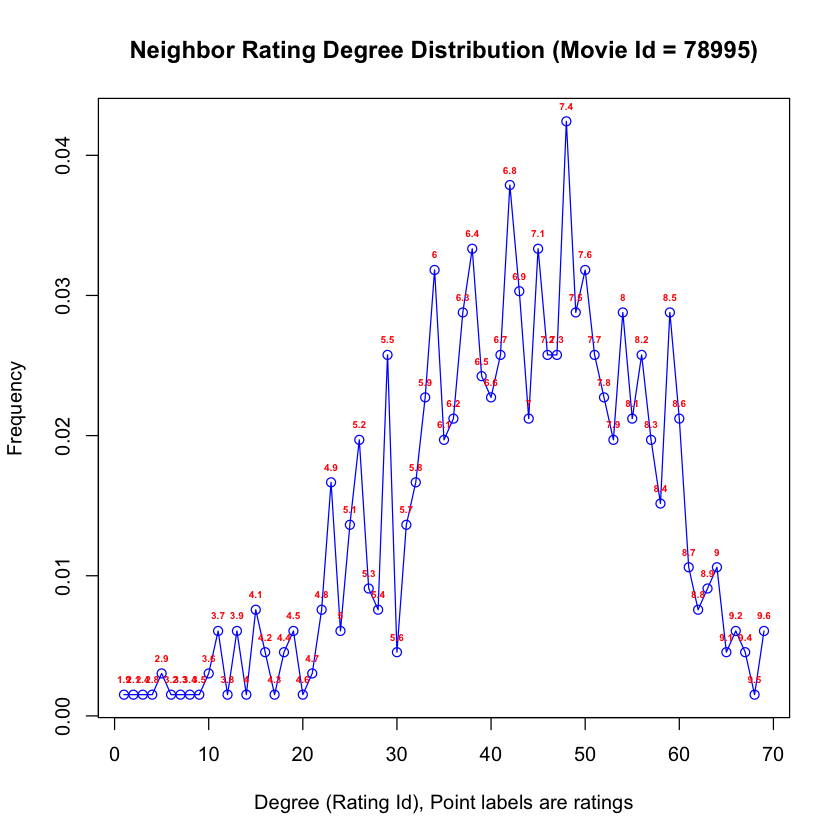

In [151]:
movies = c(10321,39182,78995)
ids = c(id1,id2,id3)
coms = find_same_coms(g, communities, movies, ids)
for(i in 1:length(coms)) {
    com = coms[[i]]
    new_id = which(V(com)$name == movies[i])
    find_neighbors2(com,movies[i])
}

In [171]:
print(ids)

[1] 12307  4979 12659


In [98]:
# Q11
find_ids = function(g, movies) {
    ids = list()
    for (i in movies) {
        id = which(V(g)$name == i)
        ids = rbind(ids, id)
    } 
    return (ids)
}
find_membership = function(g, communities, movies) {
    ids = find_ids(g, movies)
    membership = list()
    for(i in 1:length(sizes(communities))) { 
        movies_same_com = (1:vcount(g))[communities$membership == i]
        for (j in 1:length(movies)) {
            vids = V(g)[movies_same_com]
            id = ids[j]
            if ( id %in% vids) {
                membership[[j]] = i
            }
        }
    }
    return (membership)
}

In [92]:
e1 <- E(g)[from(12307)]

In [93]:
e1_top_weights <- order(e1$weight, decreasing=TRUE)[1:5]

In [94]:
E(g)[ as.vector(e1)[e1_top_weights] ]

+ 5/66518974 edges from 9f6e4b3 (vertex names):
[1] 22165--10321 10321--10363 33301--10321 10321--9502  3384 --10321

In [103]:
movies1 = c(22165,10363,33301,9502,3384,10321)
membership1 = find_membership(g,communities,movies1)
membership1

[[1]]
[1] 1

[[2]]
[1] 1

[[3]]
[1] 1

[[4]]
[1] 1

[[5]]
[1] 1

[[6]]
[1] 1

In [99]:
e2 <- E(g)[from(4979)]

In [100]:
e2_top_weights <- order(e2$weight, decreasing=TRUE)[1:5]

In [101]:
E(g)[ as.vector(e2)[e2_top_weights] ]

+ 5/66518974 edges from 9f6e4b3 (vertex names):
[1] 39182--32741 39182--32744 39182--57762 39182--68813 39182--39183

In [104]:
movies2 = c(32741,32744,57762,68813,39183,39182)
membership2 = find_membership(g,communities,movies2)
membership2

[[1]]
[1] 5

[[2]]
[1] 5

[[3]]
[1] 1

[[4]]
[1] 1

[[5]]
[1] 1

[[6]]
[1] 1

In [105]:
e3 <- E(g)[from(12659)]

In [106]:
e3_top_weights <- order(e3$weight, decreasing=TRUE)[1:5]

In [107]:
E(g)[ as.vector(e3)[e3_top_weights] ]

+ 5/66518974 edges from 9f6e4b3 (vertex names):
[1] 37617--78995 78995--16741 37589--78995 78995--52491 78995--61332

In [108]:
movies3 = c(37617,16741,37589,52491,61332,78995)
membership3 = find_membership(g,communities,movies3)
membership3

[[1]]
[1] 1

[[2]]
[1] 1

[[3]]
[1] 1

[[4]]
[1] 1

[[5]]
[1] 1

[[6]]
[1] 1